# Datos de los aeropuertos de colombia

## Importar paquetes

In [24]:
# Importar librerías
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import selenium
import os
import time
import seaborn               as sns
import sklearn.metrics       as Metrics
import datetime
from datetime import timedelta
import matplotlib.dates as mdates
from   collections           import Counter
from   sklearn               import preprocessing
from   datetime              import datetime
from   collections           import Counter
from   math                  import exp
from   sklearn.linear_model  import LinearRegression as LinReg
from   sklearn.metrics       import mean_absolute_error
from   sklearn.metrics       import median_absolute_error
from   sklearn.metrics       import r2_score

%matplotlib inline
sns.set()

In [25]:
os.getcwd()

'/Users/andresrp/OneDrive - Unidad de Victimas/DS4A_workspace/Proyect'

## Carga de datos

In [26]:
cwd = os.getcwd()
df = pd.read_csv(cwd+'/data_aeropuertos_col.csv.gz',sep=',',na_values='M',low_memory=False)
ini = time.time()
df['DateTime'] = df['valid'].apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d %H:%M"))
fin = time.time()
print(fin-ini) # 8.79
print('---------------')
# print(df.shape)
df.tail(3)

4.206583023071289
---------------


,station,valid,lon,lat,tmpf,dwpf,relh,drct,sknt,p01i,...,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,DateTime
493593,SKPE,2019-10-15 23:00,-75.7395,4.8127,71.6,68.0,88.43,220.0,5.0,0.0,...,TS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SKPE 152300Z 22005KT 9000 TS FEW010CB SCT017 S...,2019-10-15 23:00:00
493594,SKSM,2019-10-15 23:00,-74.2306,11.1197,86.0,77.0,74.61,20.0,8.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.15,SKSM 152300Z 02008KT 9999 FEW020CB BKN200 30/2...,2019-10-15 23:00:00
493595,SKCG,2019-10-15 23:00,-75.5130,10.4424,78.8,73.4,83.55,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SKCG 152300Z 00000KT 9999 FEW012 BKN070 26/23 ...,2019-10-15 23:00:00


In [27]:
print('-----------------------------------------------------------------------------------')
print(df.shape)
print('-----------------------------------------------------------------------------------')
print(df.columns)

-----------------------------------------------------------------------------------
(493596, 32)
-----------------------------------------------------------------------------------
Index(['station', 'valid', 'lon', 'lat', 'tmpf', 'dwpf', 'relh', 'drct',
       'sknt', 'p01i', 'alti', 'mslp', 'vsby', 'gust', 'skyc1', 'skyc2',
       'skyc3', 'skyc4', 'skyl1', 'skyl2', 'skyl3', 'skyl4', 'wxcodes',
       'ice_accretion_1hr', 'ice_accretion_3hr', 'ice_accretion_6hr',
       'peak_wind_gust', 'peak_wind_drct', 'peak_wind_time', 'feel', 'metar',
       'DateTime'],
      dtype='object')


## Análisis exploratorio de datos

### Exploración de datos faltantes

Text(0.5, 1, 'Missing Values Plot')

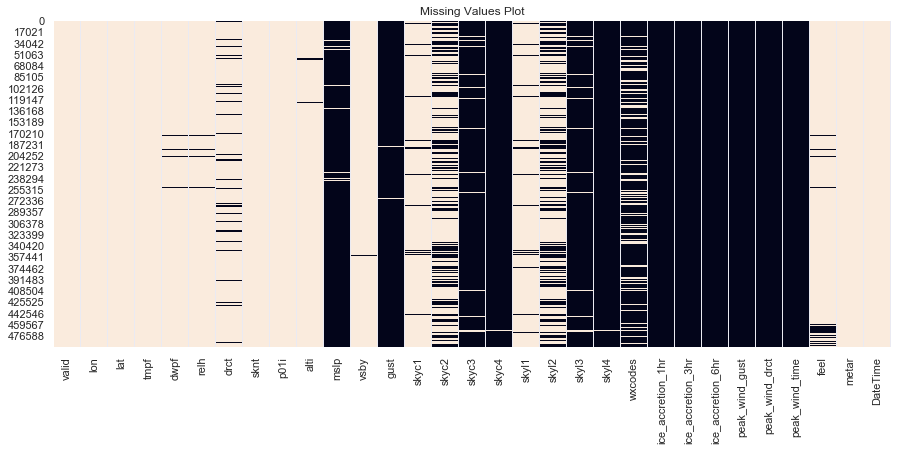

In [28]:
## Grafico de Vacios
fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(~df.drop('station',axis=1).isnull(), cbar=False)
plt.xticks(rotation=90)
plt.title('Missing Values Plot')
#plt.show()

In [29]:
## Grafico de Vacios Segun numero de Vacios por columna
### Obtener serie de numero de vacios por columna
nas = ~df.drop('station',axis=1).isnull()
nas = nas.sum().sort_values(ascending=False)
# nas

In [30]:
### Re ordenar el df de vacios en funcion de el total de vacios por columna
nas_df = ~df.drop('station',axis=1).isnull()
nas_df = nas_df[nas.index]
nas_df.head()

,DateTime,metar,lon,lat,p01i,valid,sknt,tmpf,vsby,dwpf,...,mslp,gust,skyc4,skyl4,peak_wind_drct,peak_wind_gust,peak_wind_time,ice_accretion_3hr,ice_accretion_1hr,ice_accretion_6hr
0,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [31]:
### Re ordenar el df de vacios en funcion de el total de vacios por fila
nas_df['n_null']=nas_df.sum(axis=1)
nas_df = nas_df.sort_values(by='n_null')

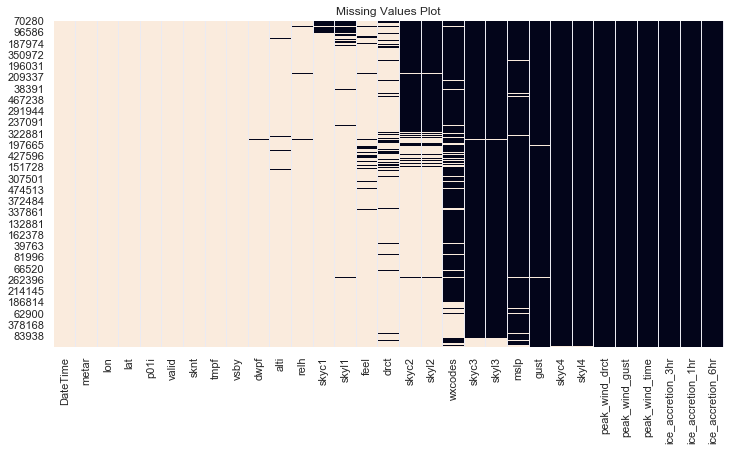

In [32]:
### Graficar
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(nas_df.drop('n_null',axis=1),cbar=False)
plt.xticks(rotation=90)
plt.title('Missing Values Plot')
plt.show()

### Proporción de datos faltantes por variable

In [33]:
nas = df.isnull().sum()*100.0/df.shape[0]
nas = nas.sort_values()

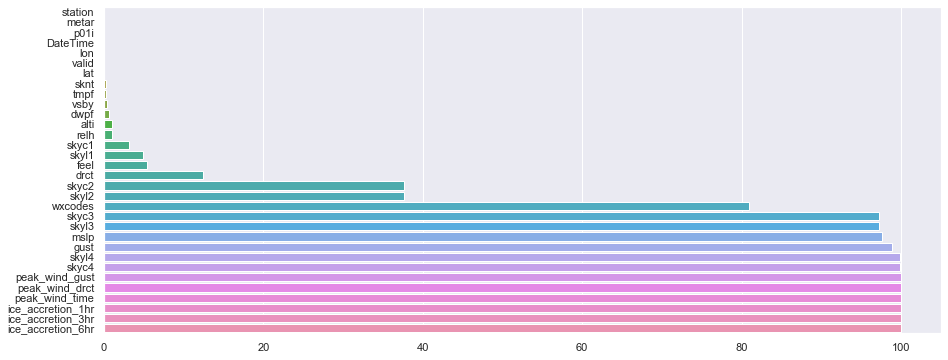

In [34]:
### Barras de Porcentaje de Vacios
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(x=nas,y=nas.index) # ,palette='RdBu'
plt.show()

In [41]:
### Calcular porcentaje de vacios por columna
cols = df.isnull().sum()*100.0/df.shape[0]
cols = cols[cols<=22]

#### Seleccionar todas las columnas
df_clean = df.copy();
df_clean = df_clean[cols.index.values].copy();

#### La columna metar contiene el reporte sin procesar. Eliminarla.
df_clean.drop('metar',axis=1,inplace=True)
print(df_clean.columns); 
print(df_clean.shape)
print('-----------')

# Seleccionar solamente los aeropuertos internacionales
df_clean.shape # (479849, 13)
inter_airport=['SKAR','SKBQ','SKBO','SKBG','SKCL','SKCC','SKCG','SKRG','SKPE','SKSP','SKSM','SKMR'] #12
df_clean = df_clean[df_clean['station'].isin(inter_airport)]
print(df_clean.shape) # (254530, 13)

df_clean.head(10)

Index(['station', 'valid', 'lon', 'lat', 'tmpf', 'dwpf', 'relh', 'drct',
       'sknt', 'p01i', 'alti', 'vsby', 'skyc1', 'skyl1', 'feel', 'DateTime'],
      dtype='object')
(493596, 16)
-----------
(263073, 16)


,station,valid,lon,lat,tmpf,dwpf,relh,drct,sknt,p01i,alti,vsby,skyc1,skyl1,feel,DateTime
0,SKBG,2017-01-10 00:00,-73.2000,7.1000,66.2,66.2,100.00,0.0,0.0,0.00,29.99,3.11,SCT,600.0,66.20,2017-01-10
1,SKPE,2017-01-10 00:00,-75.7395,4.8127,69.8,64.4,82.98,80.0,3.0,0.00,30.01,4.97,SCT,1600.0,69.80,2017-01-10
2,SKBO,2017-01-10 00:00,-74.1470,4.7016,55.4,51.8,87.65,320.0,4.0,0.00,30.27,6.21,SCT,1700.0,55.40,2017-01-10
3,SKCC,2017-01-10 00:00,-72.5115,7.9276,75.2,69.8,83.32,NaN,2.0,0.00,29.94,5.59,SCT,1500.0,76.34,2017-01-10
5,SKSP,2017-01-10 00:00,-81.7112,12.5836,78.8,73.4,83.55,20.0,16.0,0.00,29.98,6.21,FEW,1700.0,82.03,2017-01-10
7,SKAR,2017-01-10 00:00,-75.7167,4.5000,66.2,64.4,93.92,0.0,0.0,0.00,30.01,6.21,SCT,2300.0,66.20,2017-01-10
8,SKBQ,2017-01-10 00:00,-74.7808,10.8896,78.8,73.4,83.55,20.0,22.0,0.00,29.86,6.21,FEW,1500.0,82.03,2017-01-10
9,SKSM,2017-01-10 00:00,-74.2306,11.1197,80.6,71.6,74.11,40.0,16.0,0.00,29.83,6.21,FEW,2000.0,84.57,2017-01-10
13,SKRG,2017-01-10 00:00,-75.4333,6.1333,60.8,57.2,87.92,0.0,0.0,0.00,30.25,6.21,SCT,1200.0,60.80,2017-01-10
14,SKCL,2017-01-10 00:00,-76.3816,3.5432,73.4,66.2,78.19,20.0,3.0,0.00,29.95,6.21,SCT,4000.0,73.40,2017-01-10


## Estructurar la base para el análisis

### a. Para multiples registros por hora, calcular el promedio de las observaciones de la misma hora

In [37]:
# correr solamente una vez
df_clean['day_hour'] = df_clean['DateTime'].apply(lambda x: str(x)[:13])
df_clean = df_clean.groupby(['station', 'day_hour']).mean().reset_index()
print(df.shape)
print(df_clean.shape)     # (493596, 32)
df_clean.head(5)          # (479849, 21)
df_clean.columns

KeyError: 'DateTime'

##### b. Crear las horas que no tienen observaciones

In [14]:
df_clean.head()

,station,day_hour,lon,lat,tmpf,dwpf,relh,drct,sknt,alti,vsby,skyl1,feel
0,SKAR,2017-01-10 00,-75.7167,4.5,66.2,64.4,93.92,0.0,0.0,30.01,6.21,2300.0,66.2
1,SKAR,2017-01-10 01,-75.7167,4.5,64.4,64.4,100.00,0.0,0.0,30.03,6.21,2300.0,64.4
2,SKAR,2017-01-10 02,-75.7167,4.5,64.4,62.6,93.88,0.0,0.0,30.05,6.21,2300.0,64.4
3,SKAR,2017-01-10 03,-75.7167,4.5,64.4,62.6,93.88,0.0,0.0,30.06,6.21,2300.0,64.4
4,SKAR,2017-01-10 04,-75.7167,4.5,64.4,62.6,93.88,0.0,0.0,30.07,6.21,2200.0,64.4


In [15]:
# Ver la fecha mínima y máxima del dataframe para calcular la serie de horas que debería tener el df
df_clean.day_hour = pd.to_datetime(df_clean.day_hour)
minimo = df_clean.day_hour.min()
maximo = df_clean.day_hour.max()
print(minimo)
print(maximo)

2017-01-10 00:00:00
2019-10-15 23:00:00


In [16]:
# Acotar la longitud y latitud para tener siempre las mismas coordenadas
df_clean['lon'] = df_clean['lon'].round(4)
df_clean['lat'] = df_clean['lat'].round(4)
aux = df_clean[df_clean['station'].isin(inter_airport)]
lista = aux[['station','lon','lat']].drop_duplicates().values.tolist()

In [17]:
lista

[['SKAR', -75.7167, 4.5],
 ['SKBG', -73.2, 7.1],
 ['SKBO', -74.147, 4.7016],
 ['SKBQ', -74.7808, 10.8896],
 ['SKCC', -72.5115, 7.9276],
 ['SKCG', -75.513, 10.4424],
 ['SKCL', -76.3816, 3.5432],
 ['SKMR', -75.8523, 8.8031],
 ['SKPE', -75.7395, 4.8127],
 ['SKRG', -75.4333, 6.1333],
 ['SKSM', -74.2306, 11.1197],
 ['SKSP', -81.7112, 12.5836]]

In [18]:
df_clean2 = pd.DataFrame()
for j,i in enumerate(lista):
    x = pd.DataFrame(pd.date_range(start=minimo, end=maximo, freq = 'H'), columns = ['day_hour'])
    x['station'] = i[0]
    x['lon'] = i[1]
    x['lat'] = i[2]
    if j == 0:
        df_clean2 = x
    else:
        df_clean2 = df_clean2.append(x)

print(len(df_clean2))
# print(df_clean.head())
# print(df_clean2.head())
# print(df_clean2.tail())
# print('----------------------------')
# print(df_clean2.info())
# print('----------------------------')
# print(df_clean.info())

df_clean2 = df_clean.merge(df_clean2, left_on =['station','day_hour','lat','lon'], right_on=['station','day_hour','lat','lon'], how = 'right')

290592


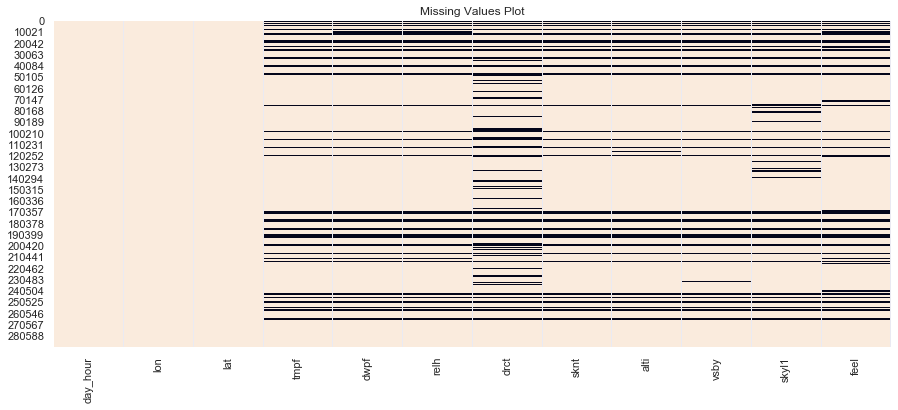

In [19]:
df_clean2.sort_values(['station','day_hour'],inplace=True)
df_clean2.reset_index(drop=True,inplace=True)
## Grafico de Vacios
fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(~df_clean2.drop('station',axis=1).isnull(), cbar=False)
plt.xticks(rotation=90)
plt.title('Missing Values Plot')
plt.show()

##### c. Evaluar los Metodos de Imputacion Multivariados

In [31]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [23]:
## Dataset con todas las variables completas
df_full = df_clean2.copy().dropna()


## Data set de entrenamiento
np.random(12)
#df_full

#imputer = IterativeImputer()
